In [1]:
import pandas as pd
import numpy as np
import wrangle_zillow as w
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, QuantileTransformer, PowerTransformer, RobustScaler, MinMaxScaler
import scipy.stats as stats

## Zillow Dataset

Create a python script or jupyter notebook named explore_zillow and do the following:

1. Ask at least 5 questions about the data, keeping in mind that your target variable is logerror. e.g. Is logerror significantly different for properties in LA County vs Orange County vs Ventura County?

2. Answer those questions through a mix of statistical tests and visualizations.

In your exploration, be sure you include the following:

1. a plot with at least 3 dimensions, such as x, y, and color.

2. at least 3 different types of plots (like box, scatter, bar, ...)

3. at least 2 statistical tests.

4. document takeaways/conclusions after each question is addressed.



In [2]:
df = w.get_zillow_data()

In [3]:
df.head()

,parcelid,typeconstructiontypeid,storytypeid,propertylandusetypeid,heatingorsystemtypeid,buildingclasstypeid,architecturalstyletypeid,airconditioningtypeid,id,basementsqft,...,id.1,logerror,transactiondate,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,propertylandusedesc,storydesc,typeconstructiondesc
0,14297519,NaN,NaN,261.0,NaN,NaN,NaN,NaN,1727539,NaN,...,0,0.025595,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
1,17052889,NaN,NaN,261.0,NaN,NaN,NaN,NaN,1387261,NaN,...,1,0.055619,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
2,14186244,NaN,NaN,261.0,NaN,NaN,NaN,NaN,11677,NaN,...,2,0.005383,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
3,12177905,NaN,NaN,261.0,2.0,NaN,NaN,NaN,2288172,NaN,...,3,-0.103410,2017-01-01,NaN,NaN,NaN,Central,Single Family Residential,NaN,NaN
4,10887214,NaN,NaN,266.0,2.0,NaN,NaN,1.0,1970746,NaN,...,4,0.006940,2017-01-01,Central,NaN,NaN,Central,Condominium,NaN,NaN


In [4]:
df.shape

(77580, 69)

In [5]:
df = w.single_unit_properties(df)

In [6]:
df = w.handle_missing_values(df, prop_required_column = .60, prop_required_row = .60)

In [7]:
train, validate, test = w.impute_missing_values(df)

In [8]:
train, validate, test = w.impute_missing_values_1(train, validate, test)

In [9]:
train.isnull().sum()

parcelid                        0
bathroomcnt                     0
bedroomcnt                      0
buildingqualitytypeid           0
calculatedfinishedsquarefeet    0
finishedsquarefeet12            0
fips                            0
fullbathcnt                     0
latitude                        0
longitude                       0
lotsizesquarefeet               0
propertycountylandusecode       0
rawcensustractandblock          0
regionidcity                    0
regionidcounty                  0
regionidzip                     0
roomcnt                         0
unitcnt                         0
yearbuilt                       0
structuretaxvaluedollarcnt      0
taxvaluedollarcnt               0
assessmentyear                  0
landtaxvaluedollarcnt           0
taxamount                       0
censustractandblock             0
logerror                        0
transactiondate                 0
heatingorsystemdesc             0
propertylandusedesc             0
dtype: int64

In [10]:
train.describe()

,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,latitude,longitude,...,roomcnt,unitcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror
count,2.814000e+04,28140.000000,28140.000000,28140.000000,28140.000000,28140.000000,28140.000000,28140.000000,2.814000e+04,2.814000e+04,...,28140.000000,28140.0,28140.000000,2.814000e+04,2.814000e+04,28140.0,2.814000e+04,28140.000000,2.814000e+04,28140.000000
mean,1.299271e+07,2.195149,3.234648,6.102310,1818.829424,1820.260697,6049.222033,2.130704,3.402292e+07,-1.181904e+08,...,1.914108,1.0,1962.815316,1.718253e+05,4.678371e+05,2016.0,2.961702e+05,5735.153407,6.050994e+13,0.017973
std,3.005899e+06,0.819424,0.844741,1.299255,777.869454,776.168915,21.055503,0.794658,2.757282e+05,3.556186e+05,...,3.130002,0.0,22.695237,1.581433e+05,4.767396e+05,0.0,3.692920e+05,5488.246842,2.527465e+12,0.177660
min,1.071186e+07,1.000000,1.000000,1.000000,300.000000,300.000000,6037.000000,1.000000,3.334085e+07,-1.194754e+08,...,0.000000,1.0,1885.000000,1.480000e+02,1.000000e+03,2016.0,1.000000e+03,49.180000,6.037101e+13,-4.655420
25%,1.150393e+07,2.000000,3.000000,6.000000,1256.000000,1260.000000,6037.000000,2.000000,3.382610e+07,-1.183947e+08,...,0.000000,1.0,1950.000000,7.617100e+04,1.883898e+05,2016.0,7.147050e+04,2607.035000,6.037402e+13,-0.024967
50%,1.258590e+07,2.000000,3.000000,6.000000,1628.000000,1631.000000,6037.000000,2.000000,3.402017e+07,-1.181467e+08,...,0.000000,1.0,1960.000000,1.280445e+05,3.624330e+05,2016.0,2.099960e+05,4516.685000,6.037620e+13,0.006600
75%,1.413714e+07,3.000000,4.000000,6.000000,2208.000000,2208.000000,6059.000000,3.000000,3.418960e+07,-1.179282e+08,...,5.000000,1.0,1978.000000,2.128605e+05,5.883750e+05,2016.0,3.902412e+05,7037.195000,6.059042e+13,0.039296
max,1.676392e+08,4.500000,5.000000,12.000000,8082.000000,8082.000000,6111.000000,4.000000,3.481064e+07,-1.175546e+08,...,13.000000,1.0,2015.000000,3.221286e+06,1.360010e+07,2016.0,1.177498e+07,154888.130000,4.830301e+14,3.394544


In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28140 entries, 13924 to 23990
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   parcelid                      28140 non-null  int64  
 1   bathroomcnt                   28140 non-null  float64
 2   bedroomcnt                    28140 non-null  float64
 3   buildingqualitytypeid         28140 non-null  float64
 4   calculatedfinishedsquarefeet  28140 non-null  float64
 5   finishedsquarefeet12          28140 non-null  float64
 6   fips                          28140 non-null  float64
 7   fullbathcnt                   28140 non-null  float64
 8   latitude                      28140 non-null  float64
 9   longitude                     28140 non-null  float64
 10  lotsizesquarefeet             28140 non-null  float64
 11  propertycountylandusecode     28140 non-null  object 
 12  rawcensustractandblock        28140 non-null  float64
 1

In [12]:
train.propertycountylandusecode.value_counts()

0100    14602
122      7148
0101     3168
1111     1858
1         520
1110      508
0104      198
010G       36
0103       31
010M       30
0108       25
010V        4
0109        3
0141        2
0102        2
1112        2
0114        1
0110        1
0105        1
Name: propertycountylandusecode, dtype: int64

## Questions

Target = logerror = y = difference between sales price and estimated price

1. What is the distribution of each of the variables?
2. Is logerror significantly different for properties in La County vs. Orange County vs. Ventura County?
3. Is there a relationship between squarefootage and logerror?
4. Is there a relationship between yearbuilt and logerror?
5. Is there a relationship between # of bedrooms, bathrooms and log error?


## 1. What is the distribution of each of the variables?

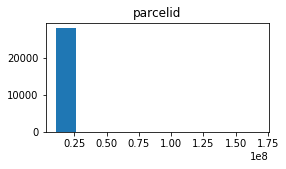

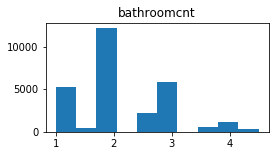

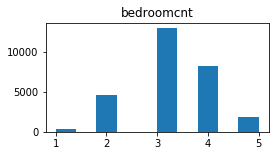

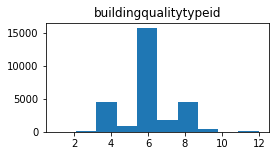

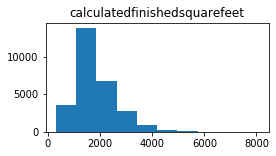

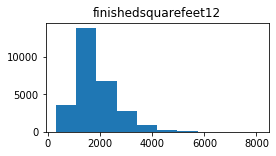

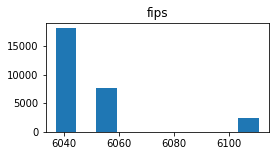

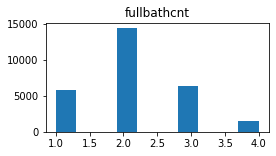

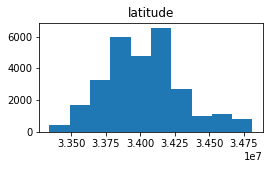

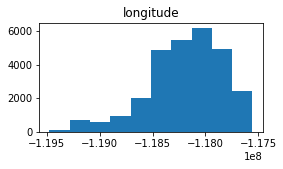

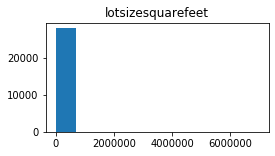

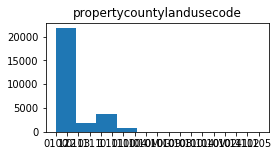

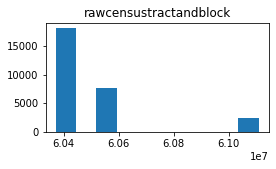

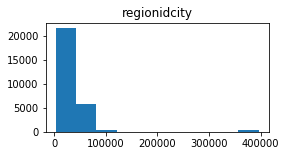

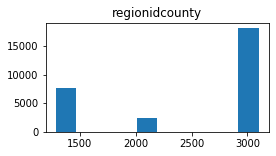

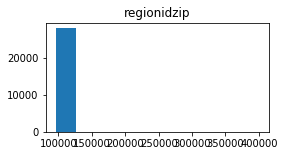

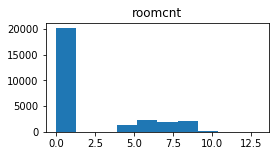

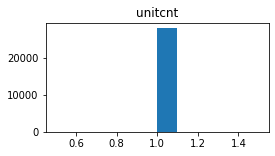

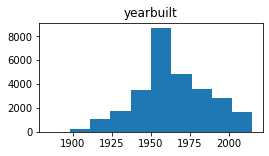

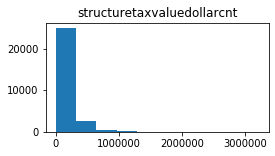

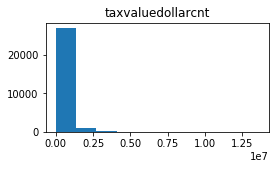

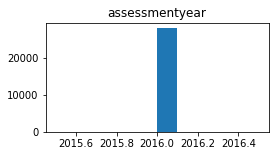

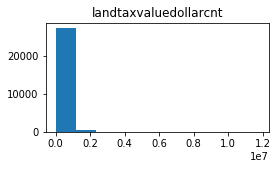

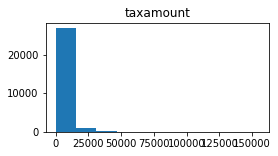

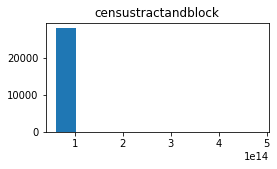

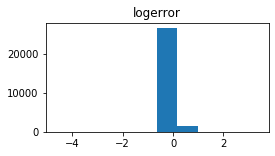

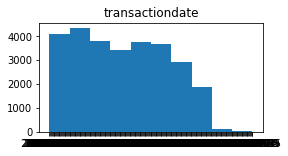

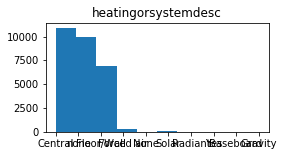

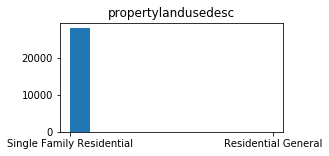

In [13]:
for col in train.columns:
    plt.figure(figsize=(4,2))
    plt.hist(train[col])
    plt.title(col)
    plt.show()

### Conclusions:
- bedroomcnt and bathroomcnt is normaly distributed
- building quality type id may want to bin
- majority of square footage is below 4K. Possibly bin
- fips are in 6037, 6059 and 6111, majority in 6037
- full bathcnt maybe bin?
- latitude is normally distributed
- longitude is left skewed
- majority of the room count is 1
- yearbuilt is normaly distributed

In [14]:
df.fips.value_counts()

6037.0    32414
6059.0    13610
6111.0     4227
Name: fips, dtype: int64

## 2. Is logerror significantly different for properties in La County vs. Orange County vs. Ventura County?

In [15]:
def fips_labels(x):
    if x['fips'] == 6037:
        return 'Los Angeles'
    elif x['fips'] == 6059:
        return 'Orange'
    elif x['fips'] == 6111:
        return 'Ventura'

In [16]:
 train['county'] = train.apply(lambda x: fips_labels(x), axis=1)

In [17]:
train = train.drop(columns = ['fips'])

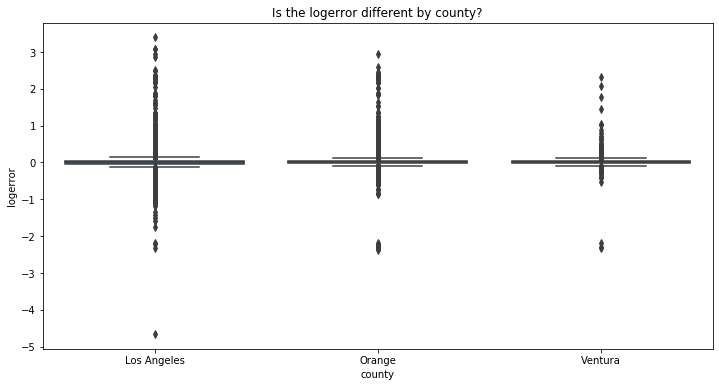

In [18]:
plt.figure(figsize=(12,6))
sns.boxplot(train.county, train.logerror)
plt.title("Is the logerror different by county?")
plt.show()

There appears to be no significant difference in county and log error

### Hypothesis testing with Anova. Dealing with 3 counties
- Ho: There is no significant difference between counties and logerror
- Ha: There is a significant difference between counties and logerror

In [19]:
los_angeles = train[train.county == 'Los Angeles'].logerror
ventura = train[train.county == 'Ventura'].logerror
orange = train[train.county == 'Orange'].logerror

In [20]:
# The levene test shows that there is a difference in variance of logerror
stats.levene(los_angeles, ventura, orange)

LeveneResult(statistic=20.559275908980904, pvalue=1.1960179421705094e-09)

In [21]:
# Kruskal used for comparing two or more independent samples of equal or different sample sizes
stats.kruskal(los_angeles, ventura, orange)

KruskalResult(statistic=37.58682396002631, pvalue=6.888503460995026e-09)

### Conclusion:
- There is a significant differnce of logerror between counties as alpha is less than 0.05

## 3. Is there a relationship between squarefootage and logerror?

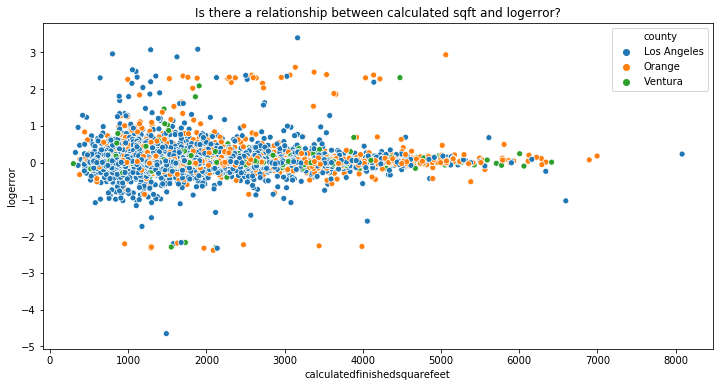

In [22]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=train, x='calculatedfinishedsquarefeet', y='logerror', hue='county')
plt.title('Is there a relationship between calculated sqft and logerror?')
plt.show()

** Take Away ** It appears most of the poperties are below 4K in sqft. Maybe bin to account. The logerror appears to be more spread out in LA and Orange counties

In [23]:
# binning the square footage
train['bin_sqft'] = pd.cut(train.calculatedfinishedsquarefeet, [0,4000,13000])

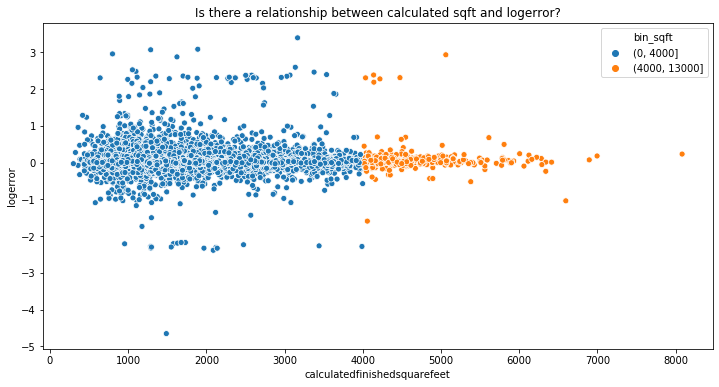

In [24]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=train, x='calculatedfinishedsquarefeet', y='logerror', hue='bin_sqft')
plt.title('Is there a relationship between calculated sqft and logerror?')
plt.show()

In [25]:
less_than_4k = train[train.calculatedfinishedsquarefeet <= 4000]
more_than_4k = train[train.calculatedfinishedsquarefeet > 4000]

In [26]:
# going to use the levene test to see if there is equal variance.
stats.levene(less_than_4k.logerror, more_than_4k.logerror)

LeveneResult(statistic=29.565413641616242, pvalue=5.4510456948521883e-08)

### There is a significant difference in the variance of binned square footage
### Going to run a 2 sample T-test
- Ho: There is no significant difference in square footage less than 4K and greater than 4K
- Ha: There is a significant difference in square footage less than 4K and greater than 4K

In [27]:
# Set equal_var to false as the variances are not equal
stats.ttest_ind(less_than_4k.logerror, more_than_4k.logerror, equal_var = False)

Ttest_indResult(statistic=-2.871608862897854, pvalue=0.004271310500227423)

Reject the null hypothesis, there is a significant difference in square footage less than 4K and greater than 4K

## Is there a relationship between yearbuilt and logerror?

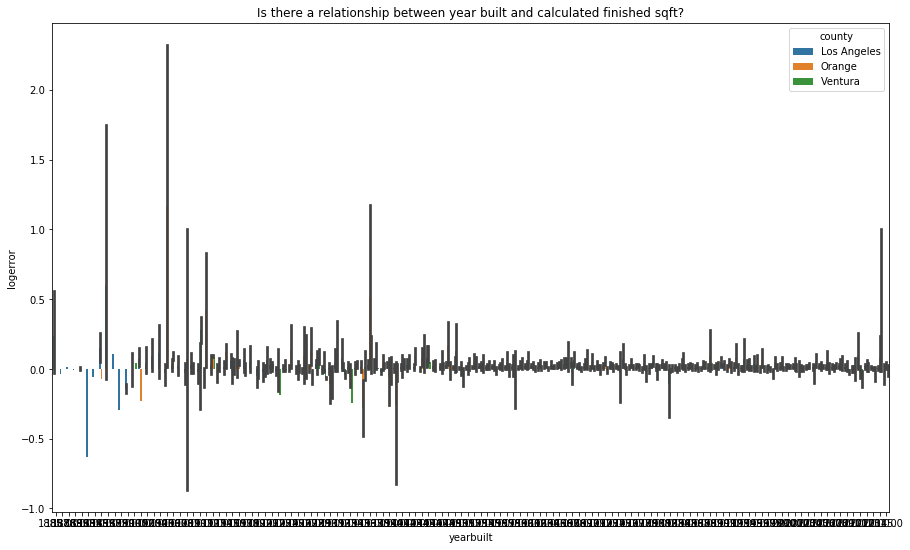

In [28]:
plt.figure(figsize=(15,9))
sns.barplot(x= 'yearbuilt', y = 'logerror', hue='county', data = train)
plt.title('Is there a relationship between year built and calculated finished sqft?')
plt.show()

### Interesting to see there is quite a bit of variance for the homes built early on and a spike at the newer homes

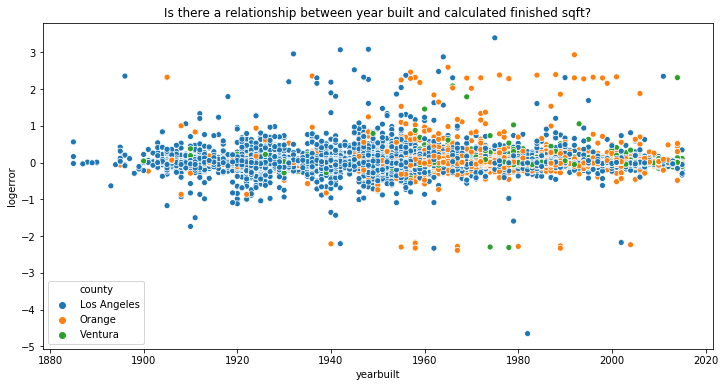

In [29]:
plt.figure(figsize = (12,6))
sns.scatterplot(data=train, x='yearbuilt', y='logerror', hue='county')
plt.title('Is there a relationship between year built and calculated finished sqft?')
plt.show()

** Take Away ** Not sure what to take out of this other than up to 1950, it appears a majority of the houses built were in LA. 

## 5. Is there a relationship between # of bedrooms, bathrooms and log error?

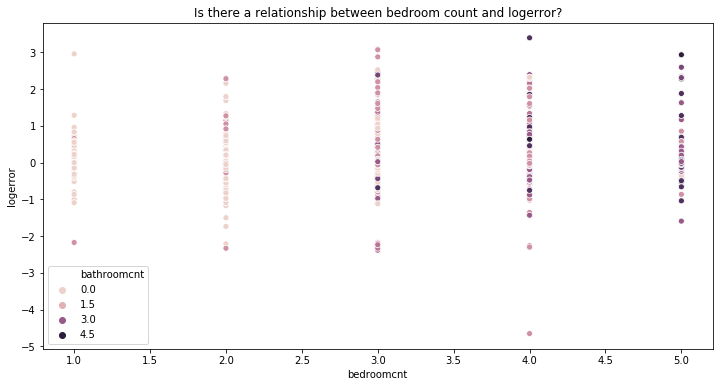

In [30]:
plt.figure(figsize = (12,6))
sns.scatterplot(data=train, x='bedroomcnt', y='logerror', hue='bathroomcnt')
plt.title('Is there a relationship between bedroom count and logerror?')
plt.show()

** TAKE AWAY ** As you have more bedrooms, you have more bathrooms duh. Between 3 and 4 bedrooms, there seems to be the highest variance in log error. 

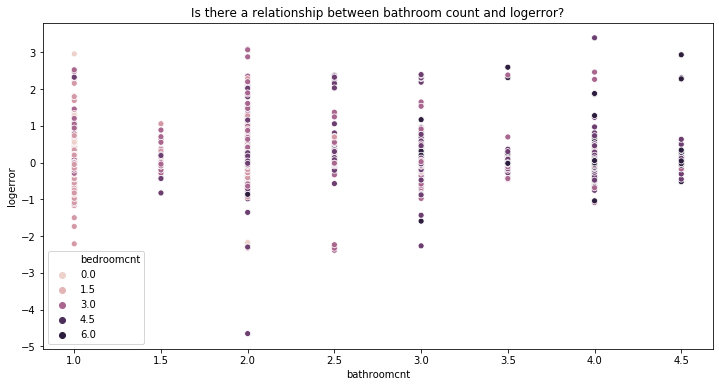

In [31]:
plt.figure(figsize = (12,6))
sns.scatterplot(data=train, x='bathroomcnt', y='logerror', hue='bedroomcnt')
plt.title('Is there a relationship between bathroom count and logerror?')
plt.show()

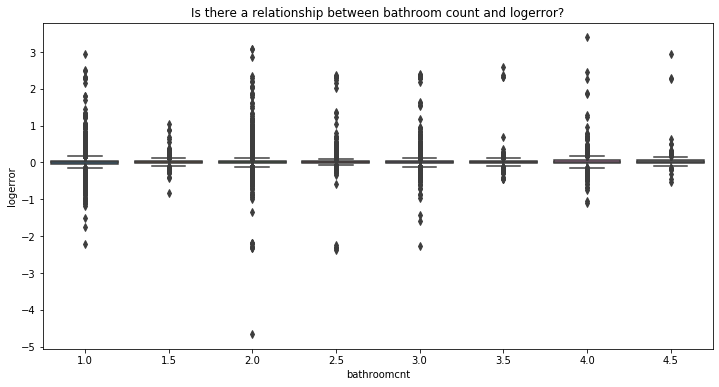

In [32]:
plt.figure(figsize = (12,6))
sns.boxplot(data=train, x='bathroomcnt', y='logerror')
plt.title('Is there a relationship between bathroom count and logerror?')
plt.show()

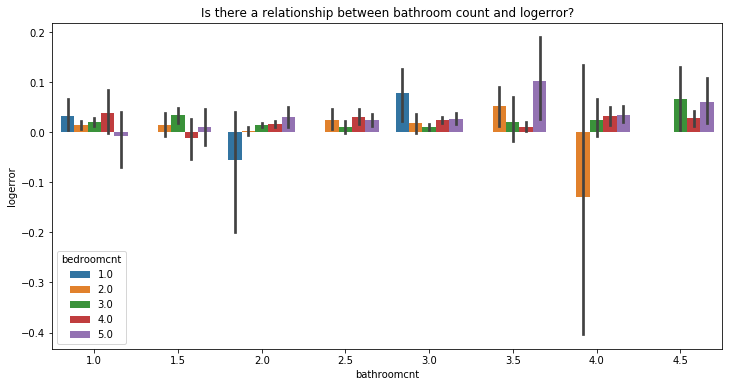

In [33]:
plt.figure(figsize = (12,6))
sns.barplot(data=train, x='bathroomcnt', y='logerror', hue='bedroomcnt')
plt.title('Is there a relationship between bathroom count and logerror?')
plt.show()

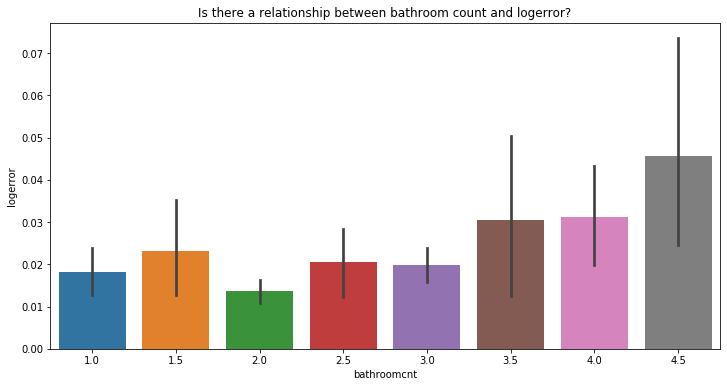

In [34]:
plt.figure(figsize = (12,6))
sns.barplot(data=train, x='bathroomcnt', y='logerror')
plt.title('Is there a relationship between bathroom count and logerror?')
plt.show()